In [1]:
!pip install pandas plotly


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd

df = pd.read_csv("hans_rosling_data.csv")
print(df.columns)


Index(['Country', 'Year', 'GDP_per_Capita', 'Life_Expectancy', 'Population'], dtype='object')


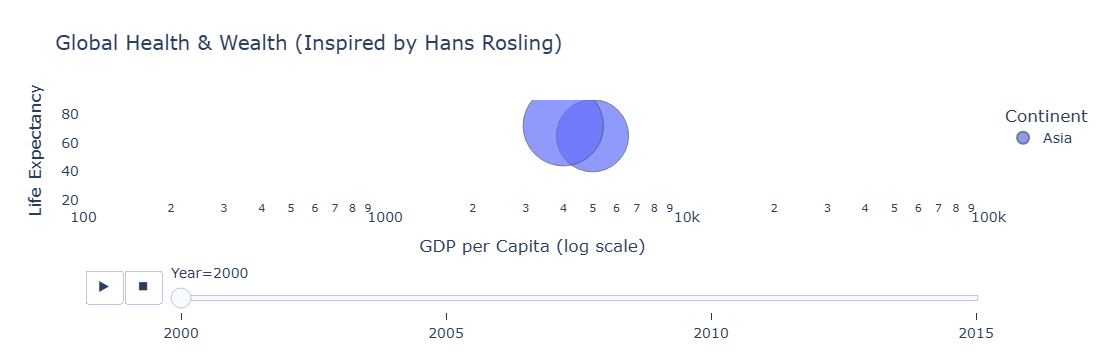

In [10]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("hans_rosling_data.csv")
expected_columns = ['Country', 'Year', 'Population', 'GDP_per_Capita', 'Life_Expectancy']
for col in expected_columns:
   if col not in df.columns:
       print(f"Column '{col}' is missing from the dataset.")
df["Year"] = df["Year"].astype(int)
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df["GDP_per_Capita"] = pd.to_numeric(df["GDP_per_Capita"], errors="coerce")
df["Life_Expectancy"] = pd.to_numeric(df["Life_Expectancy"], errors="coerce")
continent_mapping = {
    'United States': 'North America',
   'Canada': 'North America',
   'Mexico': 'North America',
    'Brazil': 'South America',
   'United Kingdom': 'Europe',
   'Germany': 'Europe',
   'France': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'Australia': 'Oceania',
    'South Africa': 'Africa',
}
df['Continent'] = df['Country'].map(continent_mapping)
df = df.dropna(subset=['Continent'])
fig = px.scatter(
    df,
    x="GDP_per_Capita",
    y="Life_Expectancy",
    animation_frame="Year",
    animation_group="Country",
    size="Population",
    color="Continent",
    hover_name="Country",
    log_x=True,
    size_max=60,
    range_x=[100, 100000],
    range_y=[20, 90],
    title="Global Health & Wealth (Inspired by Hans Rosling)"
)
fig.update_layout(
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy",
    legend_title="Continent",
    font=dict(size=14),
    plot_bgcolor="white"
)
fig.update_traces(marker=dict(line=dict(width=1, color="DarkSlateGrey")))
fig.show()

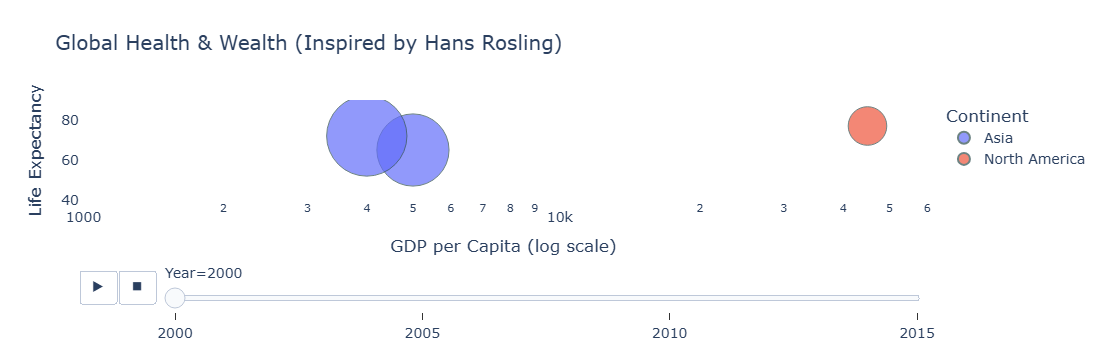

In [11]:
import pandas as pd
import plotly.express as px
data = {
   "Country": ["India", "USA", "China", "India", "USA", "China", "India", "USA", "China", "India", "USA", "China"],
    "Year": [2000, 2000, 2000, 2005, 2005, 2005, 2010, 2010, 2010, 2015, 2015, 2015],
    "GDP_per_Capita": [5000, 45000, 4000, 6000, 48000, 5500, 7000, 50000, 7000, 8500, 53000, 9000],
   "Life_Expectancy": [65, 77, 72, 67, 78, 74, 69, 79, 76, 70, 80, 78],
   "Population": [1050000000, 300000000, 1300000000, 1100000000, 310000000, 1350000000, 1150000000, 320000000, 1400000000, 1200000000, 330000000, 1450000000]
}
df = pd.DataFrame(data)
continent_mapping = {
    'India': 'Asia',
    'USA': 'North America',
    'China': 'Asia'
}
df['Continent'] = df['Country'].map(continent_mapping)
df = df.dropna(subset=['Continent'])
fig = px.scatter(
   df,
    x="GDP_per_Capita",
    y="Life_Expectancy",
    animation_frame="Year",
    animation_group="Country",
    size="Population",
    color="Continent",
    hover_name="Country",
    log_x=True,
    size_max=60,
    range_x=[1000, 60000],
    range_y=[40, 90],
    title="Global Health & Wealth (Inspired by Hans Rosling)"
)
fig.update_layout(
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy",
    legend_title="Continent",
    font=dict(size=14),
    plot_bgcolor="white"
)
fig.update_traces(marker=dict(line=dict(width=1, color="DarkSlateGrey")))
fig.show()